In [1]:
import pickle
from advectionGPdatasets.roundhill import RoundHill,RoundHillModel
from advectionGP.kernels import EQ
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.set_printoptions(precision=1,suppress=True)
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#to erase the cache..
#!rm roundhillmodel_cache.pkl
try:
    rhm = pickle.load(open('roundhillmodel_cache_diffres2.pkl','rb'))
    results = rhm.results
except FileNotFoundError:
    k = EQ(np.array([200,5,5]), 200)
    rhm = RoundHillModel(N_feat=10000,Nparticles=30,k=k,res=[120, 100, 100])
    results = rhm.compute(1)
    pickle.dump(rhm,open('roundhillmodel_cache_diffres2.pkl','wb'))

In [2]:
rhm.mInfer.getGridStepSize()
#
#5.1 x 6.2 -> 405
#2.5 x 2.5 -> 1012

(array([6.5, 2.5, 2.5]), array([120, 100, 100]))

In [3]:
rhm.mInfer.kernel.l2

array([200,   5,   5])

In [4]:
speed = np.sqrt(rhm.rh.experiments[0].windY**2 + rhm.rh.experiments[0].windX**2)

Time / s, Dist / m, height, centre, diffusion (+/-95% CI)
  30.00   50.00 ==>  957.12    7.76  0.3752 +/-  0.0004
  30.00  100.00 ==>  430.43   16.69  0.5110 +/-  0.0010
  30.00  200.00 ==>   40.23   41.46  0.3743 +/-  0.0001
 180.00   50.00 ==>  689.58    6.70  0.4881 +/-  0.0002
 180.00  100.00 ==>  354.23   13.67  0.4180 +/-  0.0005
 180.00  200.00 ==>  133.07   28.70  0.3126 +/-  0.0001
 600.00   50.00 ==>  514.89    6.15  0.6319 +/-  0.0021
 600.00  100.00 ==>  300.95   13.69  0.5163 +/-  0.0002
 600.00  200.00 ==>  117.18   29.70  0.4996 +/-  0.0002


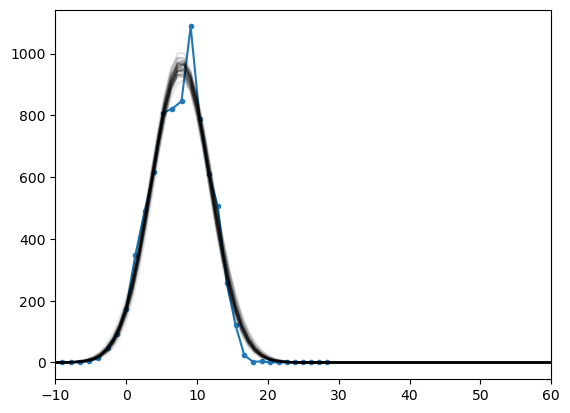

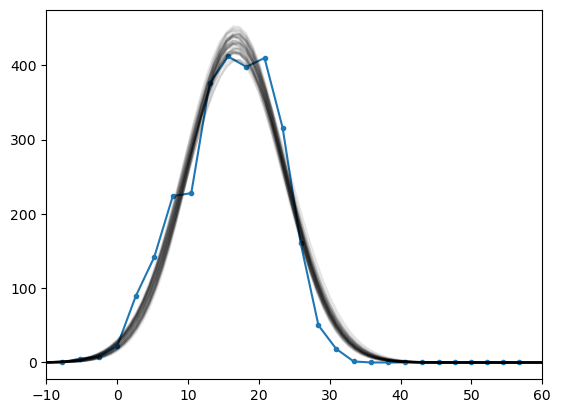

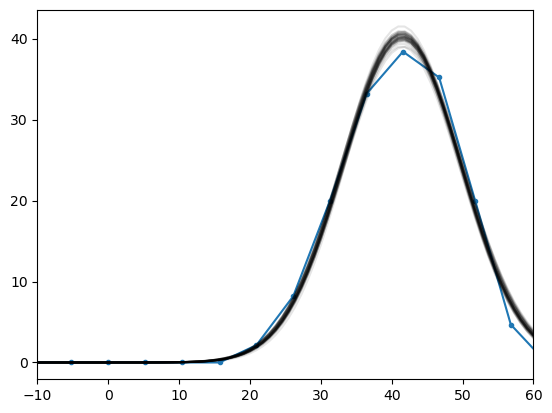

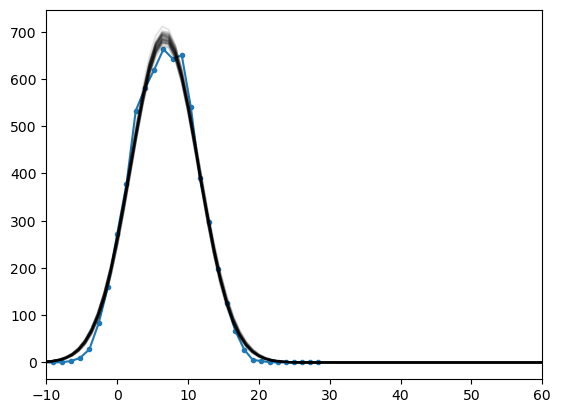

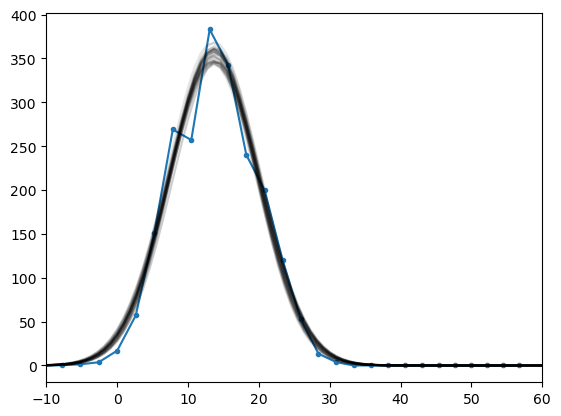

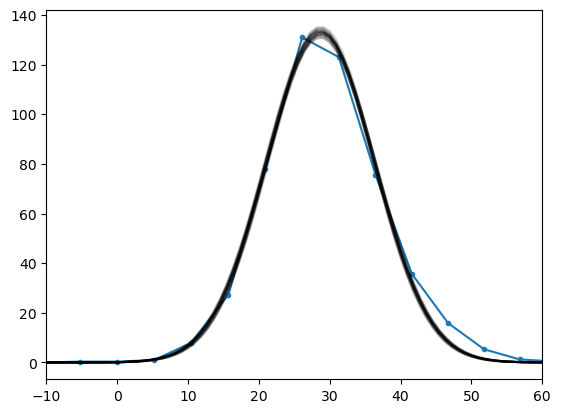

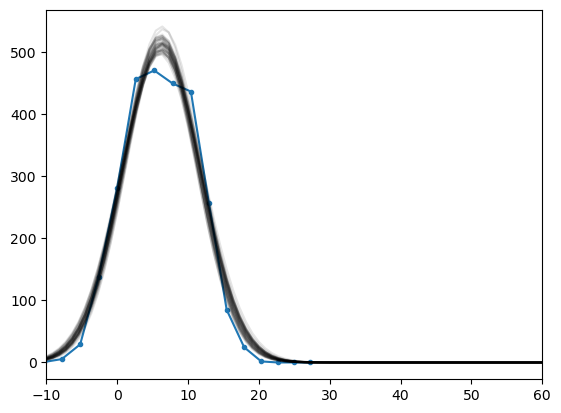

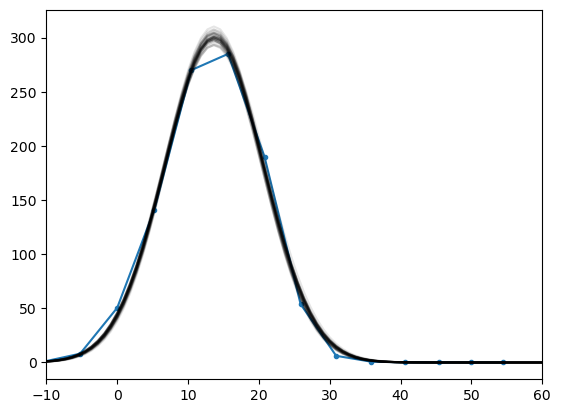

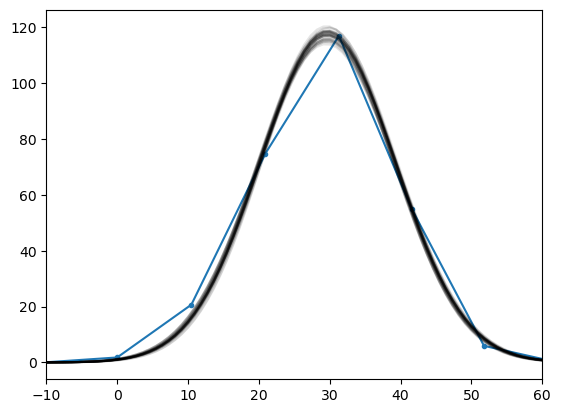

In [5]:
print("Time / s, Dist / m, height, centre, diffusion (+/-95% CI)")
diff = []
for time in [30,180,600]:
    for dist in [50,100,200]:
        plt.figure()
        X = rhm.rh.experiments[0].X
        keep = (np.abs((X[:,2]**2 + X[:,3]**2)-dist**2)<1) & (X[:,1]==time)
        X = X[keep,:].astype(float)
        angs = np.arctan2(X[:,3],X[:,2])
        angs = angs - np.mean(angs)
        x = np.sin(angs)*dist
        y = rhm.rh.experiments[0].Y[keep]
        plt.plot(x,y,'.-')
        t = dist/speed

        def func(x, h,centre, diffusion):
            return h*np.exp(-(x-centre)**2/(4*diffusion*t))

        popt, pcov = curve_fit(func, x,y)
        #plt.plot(x,func(x,120,30,0.5))
        xplot = np.linspace(-20,70,100)
        for samp in np.random.multivariate_normal(popt,pcov,40):
            plt.plot(xplot,func(xplot,samp[0],samp[1],samp[2]),'k-',alpha=0.1)
        plt.xlim([-10,60])
        diff_se = np.sqrt(pcov[2,2])**1.96
        print("%7.2f %7.2f ==> %7.2f %7.2f %7.4f +/- %7.4f" % (time,dist,popt[0],popt[1],popt[2],diff_se))
        diff.append(popt[2])
diff = np.array(diff)

In [7]:
Time / s, Dist / m, height, centre, diffusion (+/-95% CI)
  30.00   50.00 ==>  957.12    7.76  0.3752 +/-  0.0004
  30.00  100.00 ==>  430.43   16.69  0.5110 +/-  0.0010
  30.00  200.00 ==>   40.23   41.46  0.3743 +/-  0.0001
 180.00   50.00 ==>  689.58    6.70  0.4881 +/-  0.0002
 180.00  100.00 ==>  354.23   13.67  0.4180 +/-  0.0005
 180.00  200.00 ==>  133.07   28.70  0.3126 +/-  0.0001
 600.00   50.00 ==>  514.89    6.15  0.6319 +/-  0.0021
 600.00  100.00 ==>  300.95   13.69  0.5163 +/-  0.0002
 600.00  200.00 ==>  117.18   29.70  0.4996 +/-  0.0002

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

In [8]:
m,s = (np.mean(diff),1.96*np.std(diff)/np.sqrt(len(diff)))
"%0.3f +/- %0.3f (95%% CI): %0.2f-%0.2f" % (m,s,m-s,m+s)

'0.459 +/- 0.060 (95% CI): 0.40-0.52'

In [9]:
'0.459 +/- 0.060 (95% CI): 0.40-0.52'

'0.459 +/- 0.060 (95% CI): 0.40-0.52'

# Estimating Total Amounts


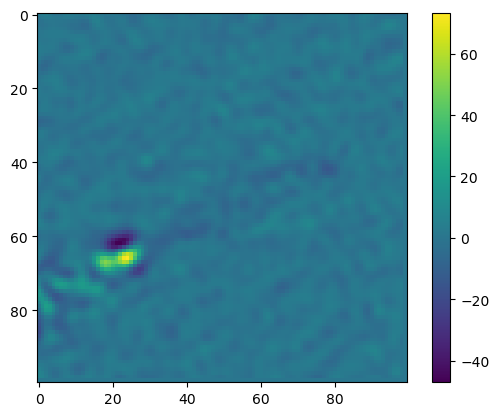

In [10]:
plt.imshow(rhm.results['sources']['all'][0,15,:,:].copy())#,clim=[-40,40])
plt.colorbar()

In [11]:
#rhm = pickle.load(open('roundhillmodel_D_noholdout_s2=250000_tls=100_ls=2.50_k0=0.500_Nfeat=10000_rep=0.pkl','rb'))
#rhm.mInfer.kernel.sigma2

In [18]:
np.random.seed(0)
Nfeat = 15000
Npart = 30
ls = 3
for rep in range(10):
    fn = 'roundhillmodel_noholdout_s2=200_ls=%d_k0=0.5_Nfeat=%d_Nparticles=%d_rep=%d.pkl' % (ls,Nfeat,Npart,rep)
    try:        
        pickle.load(open(fn,'rb'))
    except:        
        k = EQ(np.array([400,ls,ls]), 200)
        rhm = RoundHillModel(N_feat=Nfeat,Nparticles=Npart,k=k,res=[200, 100, 100],k_0=0.5,holdout=False)
        rhm.compute(1)
        pickle.dump(rhm,open(fn,'wb'))

Initialising particles...
Diffusing particles...
Computing SS...
Inverting SS...
Computing meanZ
Done
cache miss, computing source from phi...
Initialising particles...
(25, 100, 100, 3)
(30, 25, 100, 100, 3)
Particle shape:
(30, 25, 100, 100, 3)
Diffusing particles...
Skipping computation at test points, as no test points specified
Initialising particles...
Diffusing particles...
Computing SS...
Inverting SS...
Computing meanZ
Done
cache miss, computing source from phi...
Initialising particles...
(25, 100, 100, 3)
(30, 25, 100, 100, 3)
Particle shape:
(30, 25, 100, 100, 3)
Diffusing particles...
Skipping computation at test points, as no test points specified
Initialising particles...
Diffusing particles...
Computing SS...
Inverting SS...
Computing meanZ
Done
cache miss, computing source from phi...
Initialising particles...
(25, 100, 100, 3)
(30, 25, 100, 100, 3)
Particle shape:
(30, 25, 100, 100, 3)
Diffusing particles...
Skipping computation at test points, as no test points speci

In [13]:
fn

'roundhillmodel_noholdout_s2=200_ls=3_k0=0.5_Nfeat=15000_Nparticles=30_rep=0.pkl'

In [17]:
!ls roundhillmodel_noholdout_s2=200_ls=3_k0=0.5_Nfeat=15000_Nparticles=30_rep=*

'roundhillmodel_noholdout_s2=200_ls=3_k0=0.5_Nfeat=15000_Nparticles=30_rep=0.pkl'


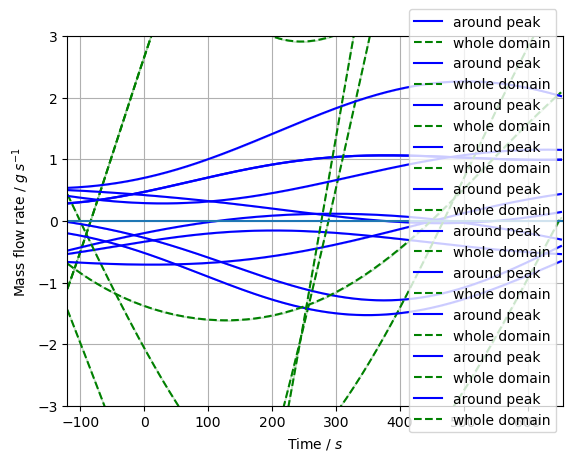

In [20]:
s2 = 250000 #8000000
rhms = []
for k0 in [0.5]:#[0.004,0.008,0.016,0.031,0.063,0.125,0.25,0.5,1,2,4,8,16][-4:]:
    plt.figure()
    for rep in np.arange(10):
        #roundhillmodel_C_noholdout_s2=8000000_tls=200_ls=2.50_k0=0.500_Nfeat=5000_rep=0.pkl
        #rhm = pickle.load(open('from_server_RH4/roundhillmodel_B_s2=200_tls=200_ls=2.50_k0=%0.3f_Nfeat=10000_rep=%d.pkl' % (k0,rep),'rb'))
        #rhm = pickle.load(open('roundhillmodel_D_noholdout_s2=%d_tls=100_ls=2.50_k0=%0.3f_Nfeat=10000_rep=%d.pkl' % (s2,k0,rep),'rb'))
        rhm = pickle.load(open('roundhillmodel_noholdout_s2=200_ls=%d_k0=0.5_Nfeat=%d_Nparticles=%d_rep=%d.pkl' % (ls,Nfeat,Npart,rep),'rb'))
        rhms.append(rhm)
        for sample_at_peak,col,style,lab in zip([True,False],['b','g'],['-','--'],['around peak','whole domain']):
            sourcemasses = []        
            if sample_at_peak:
                sources = rhm.results['sources']['all'][0,:,35:50,0:20].copy()
            else:
                sources = rhm.results['sources']['all'][0,:,:,:].copy()
            #sources[sources<0]=0
            #np.sum(sources)*np.prod(rhm.mInfer.getGridStepSize()[0][1:])
            mass = np.sum(sources,(1,2))*np.prod(rhm.mInfer.getGridStepSize()[0][1:])

            sourcemasses.append(mass)
            #plt.plot(times,mass[:-1])
            times = np.arange(rhm.mInfer.boundary[0][0],rhm.mInfer.boundary[1][0],rhm.mInfer.getGridStepSize()[0][0])[:-1]
            m = np.mean(sourcemasses,0)[:-1]/1e3 #grams from mg.
            s = (np.std(sourcemasses,0)/np.sqrt(13))[:-1]/1e3 #13 samples (finding rough SE! argh)
            #s = np.sqrt((np.var(sourcemasses,0)/13+single_sample_var))[:-1]/1e3
            #s = np.sqrt(single_sample_var)[:-1]/1e3
            #sourcemasses = np.array(sourcemasses)
            plt.plot(times,m,style+col,label=lab)
            plt.fill_between(times,m-s*1.96,m+s*1.96,color=col,alpha=0.2)
            plt.ylabel('Mass flow rate / $g\;s^{-1}$')
            plt.xlabel('Time / $s$')
            #plt.ylim([-5,12.5])#12.500])
            plt.xlim(rhm.mInfer.boundary[0][0],rhm.mInfer.boundary[1][0]-4)
        
        #plt.title("%0.3f" % k0)
        #plt.hlines(39.5e3,0,300,'r')
    plt.grid()
    plt.hlines(0,-200,1000)
    plt.legend()
    plt.ylim([-3,3])
    plt.savefig('estimated_flowrate_%0.3f.pdf' % k0)

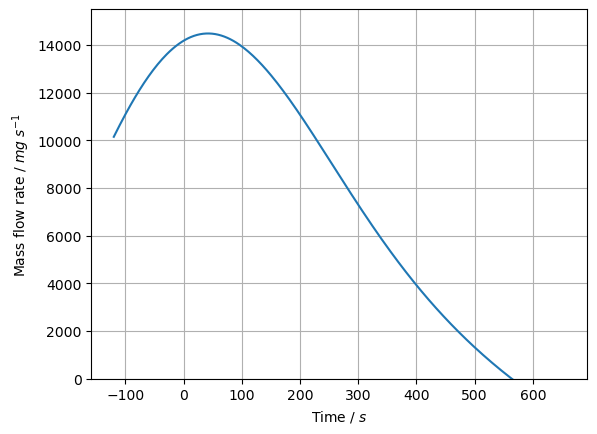

In [12]:
times = np.arange(rhm.mInfer.boundary[0][0],rhm.mInfer.boundary[1][0],rhm.mInfer.getGridStepSize()[0][0])
sourcemasses = []
for rep in range(1):
    rhm = pickle.load(open('from_server_RH4/roundhillmodel_B_s2=200_tls=200_ls=2.50_k0=0.250_Nfeat=10000_rep=%d.pkl' % rep,'rb'))
    sources = rhm.results['sources']['all'][0,:,35:50,0:20].copy()
    #sources[sources<0]=0
    #np.sum(sources)*np.prod(rhm.mInfer.getGridStepSize()[0][1:])
    mass = np.sum(sources,(1,2))*np.prod(rhm.mInfer.getGridStepSize()[0][1:])
    plt.plot(times[:-1],mass[:-1])
plt.ylabel('Mass flow rate / $mg\;s^{-1}$')
plt.xlabel('Time / $s$')
plt.ylim([0,15500])
plt.grid()
#plt.hlines(39.5e3,0,300,'r')

In [28]:
np.sum(rhm.results['sources']['all'][0,:50:10,:,:],(1,2))

array([614.4, 576.2, 528.9, 479.6, 434.8])

In [33]:
rhm.results['sources']['all'].shape

(1, 200, 100, 100)

In [17]:
rhms

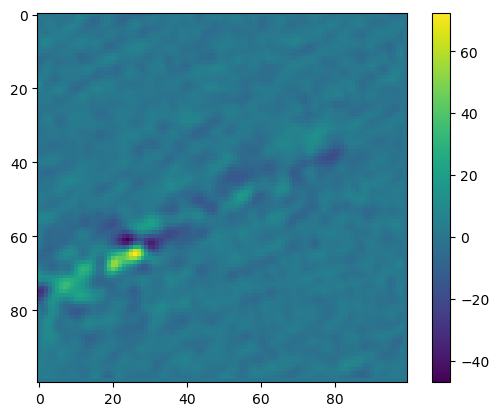

In [20]:
for rhm in rhms:
    plt.figure()
    plt.imshow(rhm.results['sources']['all'][0,40,:,:])
    plt.colorbar()

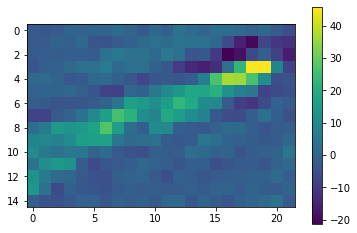

In [135]:
plt.imshow(rhm.results['sources']['all'][0,10,35:50,0:22])
plt.colorbar()

NameError: name 'rhm' is not defined

In [99]:
rhm.mInfer.getGridStepSize()

(array([2.6, 4.2, 3.5]), array([300,  60,  70]))

In [70]:
np.prod(rhm.mInfer.getGridStepSize()[0][1:])

6.2992

In [36]:
120*0.4

48.0

In [46]:
np.sum(rhm.results['sources']['all'][:,30:50,5:25],(2,3))

array([[-143.9, -164.3, -184.4, -204.2, -223.8, -243.1, -262.1, -280.9,
        -299.3, -317.5, -335.3, -352.9, -370.3, -387.3, -404.1, -420.6,
        -436.9, -452.9, -468.7, -484.2]])

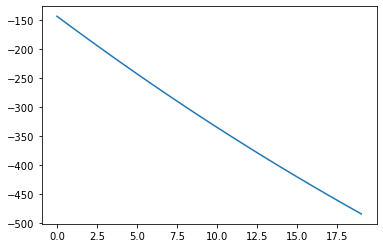

In [43]:
plt.plot(np.sum(rhm.results['sources']['all'][:,30:50,5:25],(2,3))
#plt.plot(np.sum(rhm.results['sources']['all'],(2,3))[0,:])

In [11]:
rhm.results['sources']['all'].shape
#100, 60, 70
# 80, 50, 40

(1, 120, 100, 100)

In [12]:
np.array([33,47,8,22])*np.array([50,50,40,40])/np.array([60,60,70,70])

array([27.5, 39.2,  4.6, 12.6])

In [60]:
patc

array([56, 76, 13, 33])

In [59]:
sources = np.mean(rhm.results['sources']['mean'],0)
peakloc = np.unravel_index(sources.argmax(), sources.shape)
patch = np.array([peakloc[0]-10,peakloc[0]+10,peakloc[1]-10,peakloc[1]+10])
patch[patch<0]=0

    0.00: 

IndexError: list index out of range

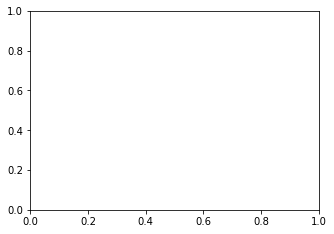

In [14]:
#patch = [33,47,8,22]
#patch = [23,41,0,19]
plt.figure(figsize=[30,30])
for j,t in enumerate(range(0,40,8)):
    print("%8.2f: " % t,end="")
    for i,samp in enumerate(rhm.results['sources']['all'][::5]):
        plt.subplot(7,5,i*5+j+1)
        plt.imshow(samp[t,patch[0]:patch[1],patch[2]:patch[3]],clim=[-50,100])
        plt.title('t=%d' % t)
        print("%8.2f, " % np.sum(samp[t,33:47,8:22]),end="")
    print("")
print("-----")
for j,t in enumerate(range(0,40,8)):
    plt.subplot(7,5,6*5+j+1)
    plt.imshow(rhm.results['sources']['mean'][t,patch[0]:patch[1],patch[2]:patch[3]],clim=[-50,100])
    #plt.colorbar()
    print("%0.2f " % np.sum(rhm.results['sources']['mean'][t,patch[0]:patch[1],patch[2]:patch[3]]),end="")
    print("(%0.2f), " % np.sqrt(np.sum(rhm.results['sources']['var'][t,patch[0]:patch[1],patch[2]:patch[3]])/len(rhm.results['sources']['all'])),end="")

In [16]:
np.mean([352.74, 442.58, 457.83, 417.53, 355.67]),np.mean([168.77, 276.14, 340.18, 309.23, 194.44]),np.mean([1048.52 ,1079.92 ,1051.43 ,982.94, 899.29 ])

(405.27, 257.752, 1012.4199999999998)

In [17]:
rhm.mInfer.getGridStepSize()

(array([6.5, 2.5, 2.5]), array([120, 100, 100]))

In [72]:
np.prod(rhm.mInfer.getGridStepSize()[0])
#117
#307
#41

40.9448

In [73]:
1012.4*41

41508.4

In [29]:
405*117

47385

In [43]:
258*307

79206